# Predicting Bad Loans with Machine Learning - Part 1: EDA

### Content List
- [Problem Statement](#Problem-Statement)
- [Imports](#Imports)
- [Loading the Data](#Loading-the-Date)
- [Defining Target Features](#Defining-the-Target-Features)
- [Dropping Specific Columns](#Dropping-specific-columns)
- [Checking the Correlations](#Checking-Correlations)
- [Visualizing EDA](#Visualizing-EDA)
- [Additional Data Cleaning](#Additional-Data-Cleaning)
- [Reviewing Data Types](#Reviewing-Data-Types)

## Problem Statement
Using Machine Learning, is it possible to predict which loans are at risk of defaulting or incomplete payback? To answer this question I build classification models that take Lending Club's loan data as input.

Preliminary EDA Steps:
- Identify the data types you are working with.
- Examine the distributions of your data, numerically and/or visually.
- Identify outliers.
- Identify missing data and look for patterns of missing data.
- Describe how your EDA will inform your modeling decisions and process.

### Imports
Standard imports, drawing heavily from pandas for data munging, whereas seaborn, folium and matplotlib were for visualizations. 

In [1]:
### Imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import folium
from datetime import datetime

#### Reading in Data from CSV
This data comes from a Kaggle dataset initially, from this link: https://www.kaggle.com/wordsforthewise/lending-club. At the onset of this project I considered utilizing the Lending Club API, but found it segmented into quarterly data which created an additional layer of data munging. Due to the inherent time constraint on the first run of this project, I opted out of interacting directly with Lending Club and chose to instead use the aforementioned link which had already aggregated the information into a single file. The author was kind enough to perform some data cleaning of their own as they "cleaned the data a tiny bit: I removed percent symbols (%) from int_rate and revol_util columns in the accepted loans and converted those columns to floats."

In [2]:
#read in file from csv to dataframe
data_read = pd.read_csv('./accepted_2007_to_2018Q4.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
for i in data_read.columns:
    print(i)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
to

In [4]:
print(f'There are a total of {len(data_read.columns)} columns by default.')

There are a total of 151 columns by default.


In [5]:
# By saving the data as something other than what was imported, I no longer need to read in the data again to reset
data = data_read

In [6]:
data.shape

(2260701, 151)

**Findings:** This is by far the largest data set I will have ever worked with, as there are over 2.26 million rows, and 145 columns for a total of more than 340 million values. I will be reducing the dataset as I continue my EDA process, but will make sure to retain as much of the potential value and representation of the dataset as possible. Additionally, I see the trajectory of data collection over time through my outside research. There is a marked differences in dataset size over time: in 2014 there were only 188,127 rows and 31 features, whereas there are now 2,260,701 rows and 151 features. This represents an increase of approximately 58.5x over the course of 3 years and speaks as to the accelerating speed of data creation.

In [7]:
### Identifying contents of data( data types, shape, descriptive statistics, etc)
missing_data = data.isna()
missing_data_amount = missing_data.sum().sum()
print(f'There are {missing_data_amount} missing values in the Lending Club dataset.')

There are 108486249 missing values in the Lending Club dataset.


In [8]:
data.dtypes.value_counts(normalize=True)

float64    0.748344
object     0.251656
dtype: float64

The object types are not overly complex as the split is approximately 75% Float64 and 25% Object. Since Machine Learning requires numeric inputs in order to function, it is a relief that there is not an overwhelming amount of Object (or any other non-numeric) data types for our 151 features. 

In [9]:
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [10]:
avg_rate = data['int_rate'].mean()
avg_rate = round((avg_rate),2)
print(f'The Average Interest Rate is: {avg_rate}%')

avg_loan = data['loan_amnt'].mean()
avg_loan = round((avg_loan),2)
print(f'The Average Loan amount is: {avg_loan}$')

The Average Interest Rate is: 13.09%
The Average Loan amount is: 15046.93$


**FINDINGS:** From the describe method, we can already verify there are multiple columns with many missing values. There are outliers present as well, specifically in annual_inc (Reported Annual Income). These will have to be dealt with before modeling. We can go ahead and immediately drop the id, member_id and url columns as they contain no information (useful or otherwise), verified by consulting the data dictionary. We can also see that there are individuals who have reported 0 annual income, which may be important moving forward merit further investigation.

## Defining the Target Features
Defining our target feature is a key element of the data science process, as our ability to generate successful predictions depends on how well we can define success and failure- commonly referenced as 1 and 0, respectively. Prior to beginning the EDA, I made sure to read at least a handful of prior approaches to the question of how to differentiate Good from Bad loans. The definition of the Target Feature split the prior work almost evenly over the question of whether to involve the "Current" loans in the Success, or 1, class. After reading through the commentary provided by the authors, I choose to eliminate the "Current" loans from the dataset entirely as there is uncertainty as to whether they will end up being successes or failures. If I included the "Current" and "In Grace Period" loans as others did- such as XXX et al did- then my model would suffer from a systematic increase in the risk of labeling True Negatives as Positive, resulting in False Positives. This would result in a two-fold loss on the part of the investors: firstly from their principal investment and secondly from the lost income from the interest payments. Therefore, I drop "Current" and combine the 'Fully Paid' sections into 1 from the 'loan_status' column. By combining remaining columns into 0, I define the Failure class for my machine learning model. 


In [11]:
loans = data['loan_status'].value_counts(normalize=True)
loans

Fully Paid                                             0.476298
Current                                                0.388521
Charged Off                                            0.118796
Late (31-120 days)                                     0.009496
In Grace Period                                        0.003732
Late (16-30 days)                                      0.001924
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000018
Name: loan_status, dtype: float64

**Thoughts:** One interesting finding is that there is a drastically lower Default percentage than I assumed. This is most likely due to the prevalence of restructuring loans, in order to pad the numbers of Lending Club and present the best foot forward for potential investors- in both the loans themselves and the company's stock. The fact that 'Current' and 'In Grace Period' account for more than 40% of the data is unfortunate, but for the reasons discussed before it is necessary to remove them. The remaining amount of data, approximately 900,000 loans, is more than enough for our needs so it is not a large concern.

In [12]:
#applying the class definitions to the columns
data = data.dropna(subset=['loan_status'])

#using masking to exclude all loans that include 'Current' and 'In Grace Period' text in the fields
data = data[data['loan_status'] != 'Current']
data = data[data['loan_status'] != 'In Grace Period']

#after dropping 'Current' and 'In Grace Period' the lambda function makes the rest of it easy!
data['classes'] = data['loan_status'].apply(lambda x: 1 if 'Fully Paid' in x else 0)

In [13]:
classes = data['classes'].value_counts(normalize=True)
classes

1    0.785157
0    0.214843
Name: classes, dtype: float64

After performing the feature engineering for the classes, it is apparent that the classes are imbalanced. I will have to normalize them in order to get a better predictive capacity for Accuracy or I can use other metrics to determine model quality.

## Dropping specific columns
This dataset is exceedingly large for features, with many overlapping features. The following list of features already exist as another feature, so I'm removing them.
- id, member_id, url as they contain no information
- all hardship columns (there is a binary flag existing)
- all secondary applicant columns (using just the application_type to signify whether it was joint or single)
- all settlement info (as this is redundant info- if the loan wasnt paid off entirely they will be in settlement)
- all columns that have more than 70% missing values (I will not be imputing fake values in an effort to maintain data purity)

In [14]:
data.isnull().sum()

id                                                  0
member_id                                     1373915
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                       88473
emp_length                                      80850
home_ownership                                      0
annual_inc                                          4
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                         

In [15]:
data.isnull().sum().sum()

71696981

In [16]:
data = data.drop(columns= ['id', 'member_id', 'url', 'policy_code'])

In [17]:
data = data.drop(columns=['loan_status'])

In [18]:
data = data.drop(columns=['zip_code','sub_grade','mths_since_last_record','mths_since_last_delinq', 'mths_since_recent_bc_dlq','mths_since_recent_bc',
                          'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'mo_sin_old_il_acct',
                          'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'last_credit_pull_d'])

In [19]:
data = data.drop(columns=['last_pymnt_d', 'next_pymnt_d','total_bal_il', 'total_bc_limit', 'total_cu_tl',
                          'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
                          'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 'initial_list_status'])

In [20]:
# All of the hardship data has been reduced to whether or not there was a payment plan present
data = data.drop(columns=['debt_settlement_flag_date', 'hardship_type',
                          'hardship_reason', 'hardship_status', 
                          'hardship_amount', 'hardship_start_date',
                          'hardship_end_date', 'payment_plan_start_date', 'hardship_length',
                          'hardship_dpd', 'hardship_loan_status', 'deferral_term',
                          'orig_projected_additional_accrued_interest',
                          'hardship_payoff_balance_amount', 'hardship_last_payment_amount'])

In [21]:
# all of these features are reduced to the 'application_type' which binarizes between single and joint applicant
data = data.drop(columns=['sec_app_earliest_cr_line',
                          'revol_bal_joint','verification_status_joint', 'dti_joint', 'annual_inc_joint',
                          'sec_app_inq_last_6mths', 'sec_app_mort_acc',
                          'sec_app_open_acc', 'sec_app_revol_util','sec_app_open_act_il',
                          'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
                          'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'sec_app_fico_range_low', 'sec_app_fico_range_high' ])

In [22]:
data = data.drop(columns=['all_util', 'open_acc_6m', 'inq_last_12m', 'open_act_il', 
                          'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 
                          'inq_fi', 'max_bal_bc', 'mths_since_last_major_derog',
                          'il_util', 'num_tl_120dpd_2m', 'mths_since_rcnt_il'])


In [23]:
#similar to prior groupings, one feature 'settlement_flag' represents these features in order to reduce complexity
data= data.drop(columns=['settlement_status', 'settlement_date',
                         'settlement_amount', 'settlement_percentage', 'settlement_term'])

## Checking Correlations

In [25]:
corr_df = data.corr()

corr_df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_il_high_credit_limit,classes
loan_amnt,1.000000,0.999556,0.998259,0.142477,0.953021,0.309873,0.032195,-0.002138,0.101643,0.101642,...,-0.021811,-0.020131,0.087934,0.020342,-0.092956,0.007817,0.334170,0.275413,0.200318,-0.072908
funded_amnt,0.999556,1.000000,0.998808,0.142571,0.953674,0.309765,0.032588,-0.001945,0.100813,0.100812,...,-0.021812,-0.020133,0.087934,0.020341,-0.092761,0.007949,0.334169,0.275413,0.200315,-0.072978
funded_amnt_inv,0.998259,0.998808,1.000000,0.142661,0.952313,0.309242,0.033657,-0.001645,0.100030,0.100029,...,-0.021826,-0.020149,0.087948,0.020290,-0.092393,0.008243,0.334197,0.275419,0.200319,-0.072597
int_rate,0.142477,0.142571,0.142661,1.000000,0.155666,-0.071362,0.146165,0.047965,-0.403169,-0.403166,...,0.026583,0.206641,-0.063701,0.248037,0.058580,0.011477,-0.118486,0.004525,-0.002747,-0.263577
installment,0.953021,0.953674,0.952313,0.155666,1.000000,0.300753,0.035986,0.007124,0.051494,0.051493,...,-0.016399,0.000162,0.070509,0.040028,-0.085199,0.014752,0.301477,0.260119,0.185541,-0.057873
annual_inc,0.309873,0.309765,0.309242,-0.071362,0.300753,1.000000,-0.139055,0.040924,0.069903,0.069904,...,0.007510,0.052413,-0.007275,-0.016370,-0.043951,0.037793,0.408800,0.315126,0.262025,0.039071
dti,0.032195,0.032588,0.033657,0.146165,0.035986,-0.139055,1.000000,-0.008023,-0.060032,-0.060035,...,-0.013967,0.068868,0.072104,0.127592,-0.016726,-0.022822,0.015190,0.223567,0.252218,-0.084895
delinq_2yrs,-0.002138,-0.001945,-0.001645,0.047965,0.007124,0.040924,-0.008023,1.000000,-0.174090,-0.174088,...,0.656164,-0.025121,-0.444748,-0.010852,-0.047360,0.011169,0.058910,0.032243,0.062321,-0.020347
fico_range_low,0.101643,0.100813,0.100030,-0.403169,0.051494,0.069903,-0.060032,-0.174090,1.000000,1.000000,...,-0.101882,-0.092465,0.300555,-0.410429,-0.202539,-0.057341,0.195576,0.031953,0.062800,0.129188
fico_range_high,0.101642,0.100812,0.100029,-0.403166,0.051493,0.069904,-0.060035,-0.174088,1.000000,1.000000,...,-0.101881,-0.092467,0.300552,-0.410426,-0.202536,-0.057341,0.195577,0.031951,0.062798,0.129186


It is clear that it is not feasible to manually interpret the correlations between features. Additionally, there are too many features for a Heatmap to have any chance of showing a grid!

In [26]:
data.isnull().sum().sort_values(ascending=False)

desc                          1247945
emp_title                       88473
emp_length                      80850
pct_tl_nvr_dlq                  70430
avg_cur_bal                     70299
num_rev_accts                   70277
num_tl_op_past_12m              70276
num_tl_30dpd                    70276
num_accts_ever_120_pd           70276
num_bc_tl                       70276
num_il_tl                       70276
num_op_rev_tl                   70276
num_rev_tl_bal_gt_0             70276
num_actv_rev_tl                 70276
num_tl_90g_dpd_24m              70276
num_actv_bc_tl                  70276
tot_coll_amt                    70276
tot_hi_cred_lim                 70276
tot_cur_bal                     70276
total_il_high_credit_limit      70276
bc_util                         65042
percent_bc_gt_75                64672
bc_open_to_buy                  64258
num_bc_sats                     58590
num_sats                        58590
mort_acc                        50030
total_bal_ex

The prevalence of missing values reveals some potential overlap in rows missing a majority of data. Hopefully, by removing one set of missing values in a column, this cleans the columns with nearly identical quantities. In particular, a cursory glance reveals that more than 15 features with a clustering around 70,200 missing values.

In [27]:
data.shape

(1373915, 72)

In [28]:
data['title'].value_counts()

Debt consolidation                          675757
Credit card refinancing                     254681
Home improvement                             76832
Other                                        68683
Major purchase                               24718
Debt Consolidation                           15763
Medical expenses                             13919
Business                                     12161
Car financing                                11445
Vacation                                      8230
Moving and relocation                         8163
Home buying                                   6125
Consolidation                                 5384
debt consolidation                            4836
Debt Consolidation Loan                       3804
Credit Card Consolidation                     2360
consolidation                                 2175
Personal Loan                                 2133
Consolidation Loan                            1778
Home Improvement               

In [29]:
data.isnull().sum().sort_values(ascending=False)

desc                          1247945
emp_title                       88473
emp_length                      80850
pct_tl_nvr_dlq                  70430
avg_cur_bal                     70299
num_rev_accts                   70277
num_tl_op_past_12m              70276
num_tl_30dpd                    70276
num_accts_ever_120_pd           70276
num_bc_tl                       70276
num_il_tl                       70276
num_op_rev_tl                   70276
num_rev_tl_bal_gt_0             70276
num_actv_rev_tl                 70276
num_tl_90g_dpd_24m              70276
num_actv_bc_tl                  70276
tot_coll_amt                    70276
tot_hi_cred_lim                 70276
tot_cur_bal                     70276
total_il_high_credit_limit      70276
bc_util                         65042
percent_bc_gt_75                64672
bc_open_to_buy                  64258
num_bc_sats                     58590
num_sats                        58590
mort_acc                        50030
total_bal_ex

In [30]:
# 'num_actv_bc_tl' is the first attempt to remove the majority of the 70,200 missing values across 17 features
data = data[data['num_actv_bc_tl'].notna()]

In [31]:
data = data[data['bc_util'].notna()]

In [32]:
data = data[data['emp_length'].notna()]

I drop the employment length missing values because, although likely to be underreported, it is worse to make up data here

In [33]:
#exploring the supplied purpose field for loans
data['purpose'].value_counts()

debt_consolidation    710891
credit_card           270494
home_improvement       76974
other                  66793
major_purchase         25068
medical                13259
small_business         12454
car                    11741
moving                  8087
vacation                7791
house                   6283
wedding                  848
renewable_energy         747
educational                1
Name: purpose, dtype: int64

In [34]:
#dropping educational as a purpose for loans due to there only being a single instance
data = data[data['purpose'] != 'educational']

In [35]:
data.shape

(1211430, 72)

### Visualizing EDA

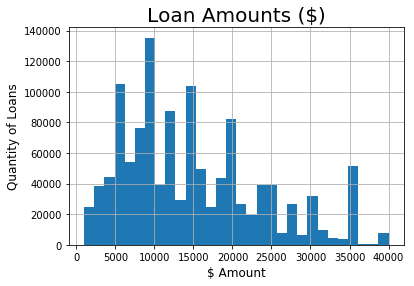

In [36]:
data['loan_amnt'].hist(bins=30)
plt.title('Loan Amounts ($)', size=20);
plt.xlabel('$ Amount', size= 12);
plt.ylabel('Quantity of Loans', size=12);

**Thoughts:** There are clearly higher frequencies associated with loan amounts that are multiples of 5,000. If I am going to be creating bins to contain the information it will be necessary to guarantee that these spikes are in the middle of the bin. Potentially will be using the following ranges: 0-2500, 2500-7500, 7501-12500, 12501-17500, 17501-22500, 22501-27500, 27501-32500, 32501-37500 and finally 37501-42500.

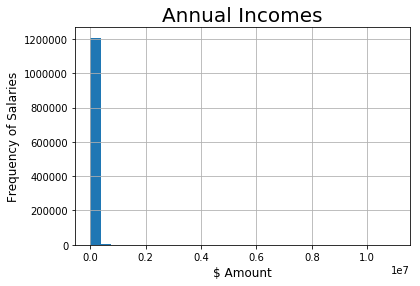

In [37]:
data['annual_inc'].hist(bins=30)
plt.title('Annual Incomes', size=20);
plt.xlabel('$ Amount', size=12);
plt.ylabel('Frequency of Salaries', size=12);

**Thoughts:** It is immediately obvious there is something going on with the annual_inc column, most likely large outliers are present. This results in the absurd graph above, which I will need to investigate further. Before removing the outliers, the income ranges from 

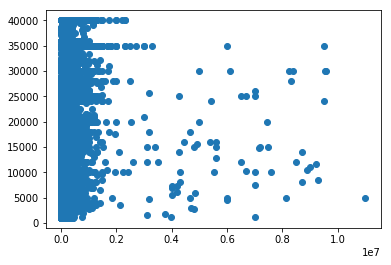

In [38]:
## SCATTER PLOT OF ANNUAL INCOME TO SHOW OUTLIERS
plt.scatter(data['annual_inc'], data['loan_amnt'])

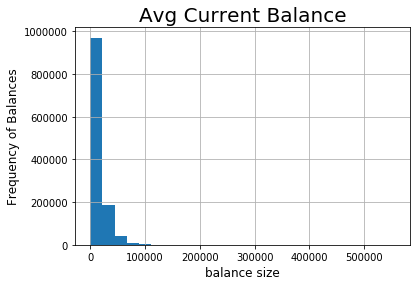

In [39]:
data['avg_cur_bal'].hist(bins=25)
plt.title('Avg Current Balance', size = 20);
plt.xlabel('balance size', size = 12);
plt.ylabel('Frequency of Balances', size = 12);

In [40]:
## SCATTER PLOT OF AVG CURRENT BALANCE TO SHOW OUTLIERS

In [41]:
data['avg_cur_bal'].describe()

count    1.211430e+06
mean     1.357119e+04
std      1.611179e+04
min      0.000000e+00
25%      3.185000e+03
50%      7.554000e+03
75%      1.885100e+04
max      5.559250e+05
Name: avg_cur_bal, dtype: float64

**Thoughts:** Another chart where outliers are most likely causing issues for our visualization of the data. This will most likely need to be capped at a certain amount in order to deal with outlier data. Checking the descriptive statistics with .describe enable us to see that there is a large jump from 75% to Max, indicating large values as the outliers as the mean is close to 75% as well.

## Data CleaningDealing with outliers- IMPROVE VISUALIZATIONS
annual_inc, avg_cur_bal

In [42]:
# capping the annual income at 300_000 in order to represent a more normal distribution and remove outliers
data_scrub = data[data['annual_inc'] <= 250_000 ]

In [43]:
# capping the minimum of annual reported income at 1_000 as that data is unreliable
data_scrub = data_scrub[data_scrub['annual_inc']> 500]

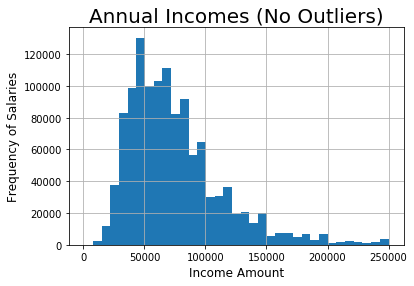

In [44]:
data_scrub['annual_inc'].hist(bins=35)
plt.title('Annual Incomes (No Outliers)', size=20);
plt.xlabel('Income Amount', size=12);
plt.ylabel('Frequency of Salaries', size=12);

In [46]:
data_scrub = data_scrub[data_scrub['avg_cur_bal'] < 60_000]

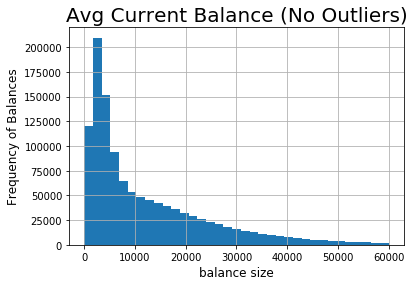

In [47]:
data_scrub['avg_cur_bal'].hist(bins=35)
plt.title('Avg Current Balance (No Outliers)', size = 20);
plt.xlabel('balance size', size = 12);
plt.ylabel('Frequency of Balances', size = 12);

### Looking at Text Fields: 
a handful of columns in this dataset are text based and need further investigation in order to determine how to manipulate them so they are more useful. As they are currently object data types we need to find a way to convert this data into numerical information. Two approaches immediately 

In [48]:
data['emp_title'].value_counts()

Teacher                                     21355
Manager                                     19772
Owner                                       10641
Registered Nurse                             8885
RN                                           8585
Supervisor                                   8370
Driver                                       7708
Sales                                        7593
Project Manager                              6428
Office Manager                               5580
General Manager                              5289
Director                                     5074
owner                                        4681
manager                                      4579
Engineer                                     4314
President                                    4260
teacher                                      4102
Vice President                               3572
driver                                       3542
Operations Manager                           3513


In [49]:
data['title'].value_counts()

Debt consolidation                         628293
Credit card refinancing                    237167
Home improvement                            69634
Other                                       61647
Major purchase                              22770
Medical expenses                            12361
Business                                    11397
Debt Consolidation                          10919
Car financing                               10553
Moving and relocation                        7399
Vacation                                     7287
Home buying                                  5623
Consolidation                                4154
debt consolidation                           3422
Credit Card Consolidation                    1648
consolidation                                1593
Debt Consolidation Loan                      1303
Consolidation Loan                           1277
Personal Loan                                1083
Credit Card Refinance                        1059


In [50]:
data['desc'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     23
  Borrower added on 03/10/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                           

**Thoughts:** With 341_751 individual unique values for emp_title, 37_177 for title and finally 73_999 in desc, there is way too much complexity for me to tackle this directly. After changing them to str, I will have to incorporate NLP into my project. Theoretically I would want to reduce the complexity in similar titles, correct for spelling issues, and a litany of other approaches that are not feasible for my time schedule. 

For this project I will be looking to measure the length of all three individual columns and engineer three new columns, then combine all user-generated text fields into one aggregated column named all_text

### Additional Data Cleaning

In [51]:
#i wrote a function to automate the dropping of rows that contain NaN in columns which had 2000 or less NaN

def drop_na(df):
    cols=data.columns
    subset=[]
    for i in cols:
        #check number of missing values
        missing_vals = df[i].isnull().sum()
        #if less than 2000 na, drop the rows containing na
        if missing_vals <= 2000:
            subset.append(i)
            
        df.dropna(subset=subset,inplace=True)
        print(f'finished checking column  "{i}"')
    print('FINISHED ALL!')

drop_na(data)

finished checking column  "loan_amnt"
finished checking column  "funded_amnt"
finished checking column  "funded_amnt_inv"
finished checking column  "term"
finished checking column  "int_rate"
finished checking column  "installment"
finished checking column  "grade"
finished checking column  "emp_title"
finished checking column  "emp_length"
finished checking column  "home_ownership"
finished checking column  "annual_inc"
finished checking column  "verification_status"
finished checking column  "issue_d"
finished checking column  "pymnt_plan"
finished checking column  "desc"
finished checking column  "purpose"
finished checking column  "title"
finished checking column  "addr_state"
finished checking column  "dti"
finished checking column  "delinq_2yrs"
finished checking column  "earliest_cr_line"
finished checking column  "fico_range_low"
finished checking column  "fico_range_high"
finished checking column  "inq_last_6mths"
finished checking column  "open_acc"
finished checking column  

In [52]:
data.isnull().sum().sort_values(ascending=False)

desc                          1135844
title                           14533
emp_title                        5806
classes                             0
revol_bal                           0
fico_range_low                      0
fico_range_high                     0
inq_last_6mths                      0
open_acc                            0
pub_rec                             0
revol_util                          0
delinq_2yrs                         0
total_acc                           0
out_prncp                           0
out_prncp_inv                       0
recoveries                          0
collection_recovery_fee             0
last_pymnt_amnt                     0
earliest_cr_line                    0
addr_state                          0
dti                                 0
debt_settlement_flag                0
purpose                             0
pymnt_plan                          0
issue_d                             0
verification_status                 0
annual_inc  

In [53]:
data['emp_title'].fillna(" . ", inplace= True)

In [54]:
data['title'].fillna(" . ", inplace= True)

In [ ]:
data['desc'].fillna(" . ", inplace= True)

In [ ]:
data.shape

(1210906, 72)

## Reviewing Data Types

In [ ]:
data.dtypes.value_counts()

float64    54
object     17
int64       1
dtype: int64

In [ ]:
object_cols = data.select_dtypes(include='object').columns

#### In order to feed the dates into my model, I need to convert the above 2 columns 'issue_d' and 'earliest_cr_line' to DateTime and then generating a new column for the difference. This difference is a proxy for their creditworthiness, or at least one element of the equation, in which the amount of history with creditors is available for analysis.

In [ ]:
data['issue_d'].head()

0    Dec-2015
1    Dec-2015
2    Dec-2015
4    Dec-2015
5    Dec-2015
Name: issue_d, dtype: object

In [ ]:
data['issue_d'] = pd.to_datetime(data['issue_d'])

In [ ]:
data['earliest_cr_line'].head()

In [ ]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

In [ ]:
# taking the difference of the 2 columns to create length of credit history
data['credit_length_days'] = data['issue_d'] - data['earliest_cr_line']

In [ ]:
#extracting just the days out of the timedate format
data['credit_length_days'] = data['credit_length_days'].dt.days

In [ ]:
#verifying the output
data['credit_length_days'].head()

In [ ]:
data.drop(columns=['issue_d', 'earliest_cr_line'], inplace=True)

As seen in the cell above, we need to strip out " days" from each piece of information to convert the datatype from timedelta64 to something that can be interpreted by the classification models. 

In [ ]:
data.isnull().sum().sort_values(ascending=False)

### Now that we have no missing values in our dataset we can move on to the next steps. In the next notebook, we continue with Feature Engineering and some additional EDA. In order to make this process as smooth as possible, I am splitting up the notebooks and exporting the current dataset to a csv file to be loaded in the next notebook.

In [ ]:
data.to_csv('./cleaned_af.csv', index=False)